In [1]:
import os
import pandas as pd
#Define Clear Console function 
def clear_console():
    os.system('cls' if os.name == 'nt' else 'clear')

In [2]:
# Load the DataFrame from the .pickle file
load_path = r"D:\Research\Python\Data\WIP\RNN_sentiment_Full.pickle"
df = pd.read_pickle(load_path)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088932 entries, 0 to 3088931
Data columns (total 15 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Datetime                  object
 1   Tweet Id                  int64 
 2   Original Text             object
 3   Username                  object
 4   date                      object
 5   keyword                   object
 6   Text                      object
 7   Mentions                  object
 8   Hashtags                  object
 9   URL Removed Text          object
 10  Emoji Removed Text        object
 11  Character Processed Text  object
 12  StopWordRemovedText       object
 13  Text_Lemmatized           object
 14  RNN_SENTIMENT             int64 
dtypes: int64(2), object(13)
memory usage: 353.5+ MB


In [4]:
# Rename the 'RNN_SENTIMENT' column to 'Sentiment'
df.rename(columns={'RNN_SENTIMENT': 'Sentiment'}, inplace=True)
df['Sentiment'] = df['Sentiment'].fillna(0)

# Convert Datetime column to datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])


In [5]:
unique_sentiments = df['Sentiment'].unique()
print(unique_sentiments)

[ 0  1 -1]


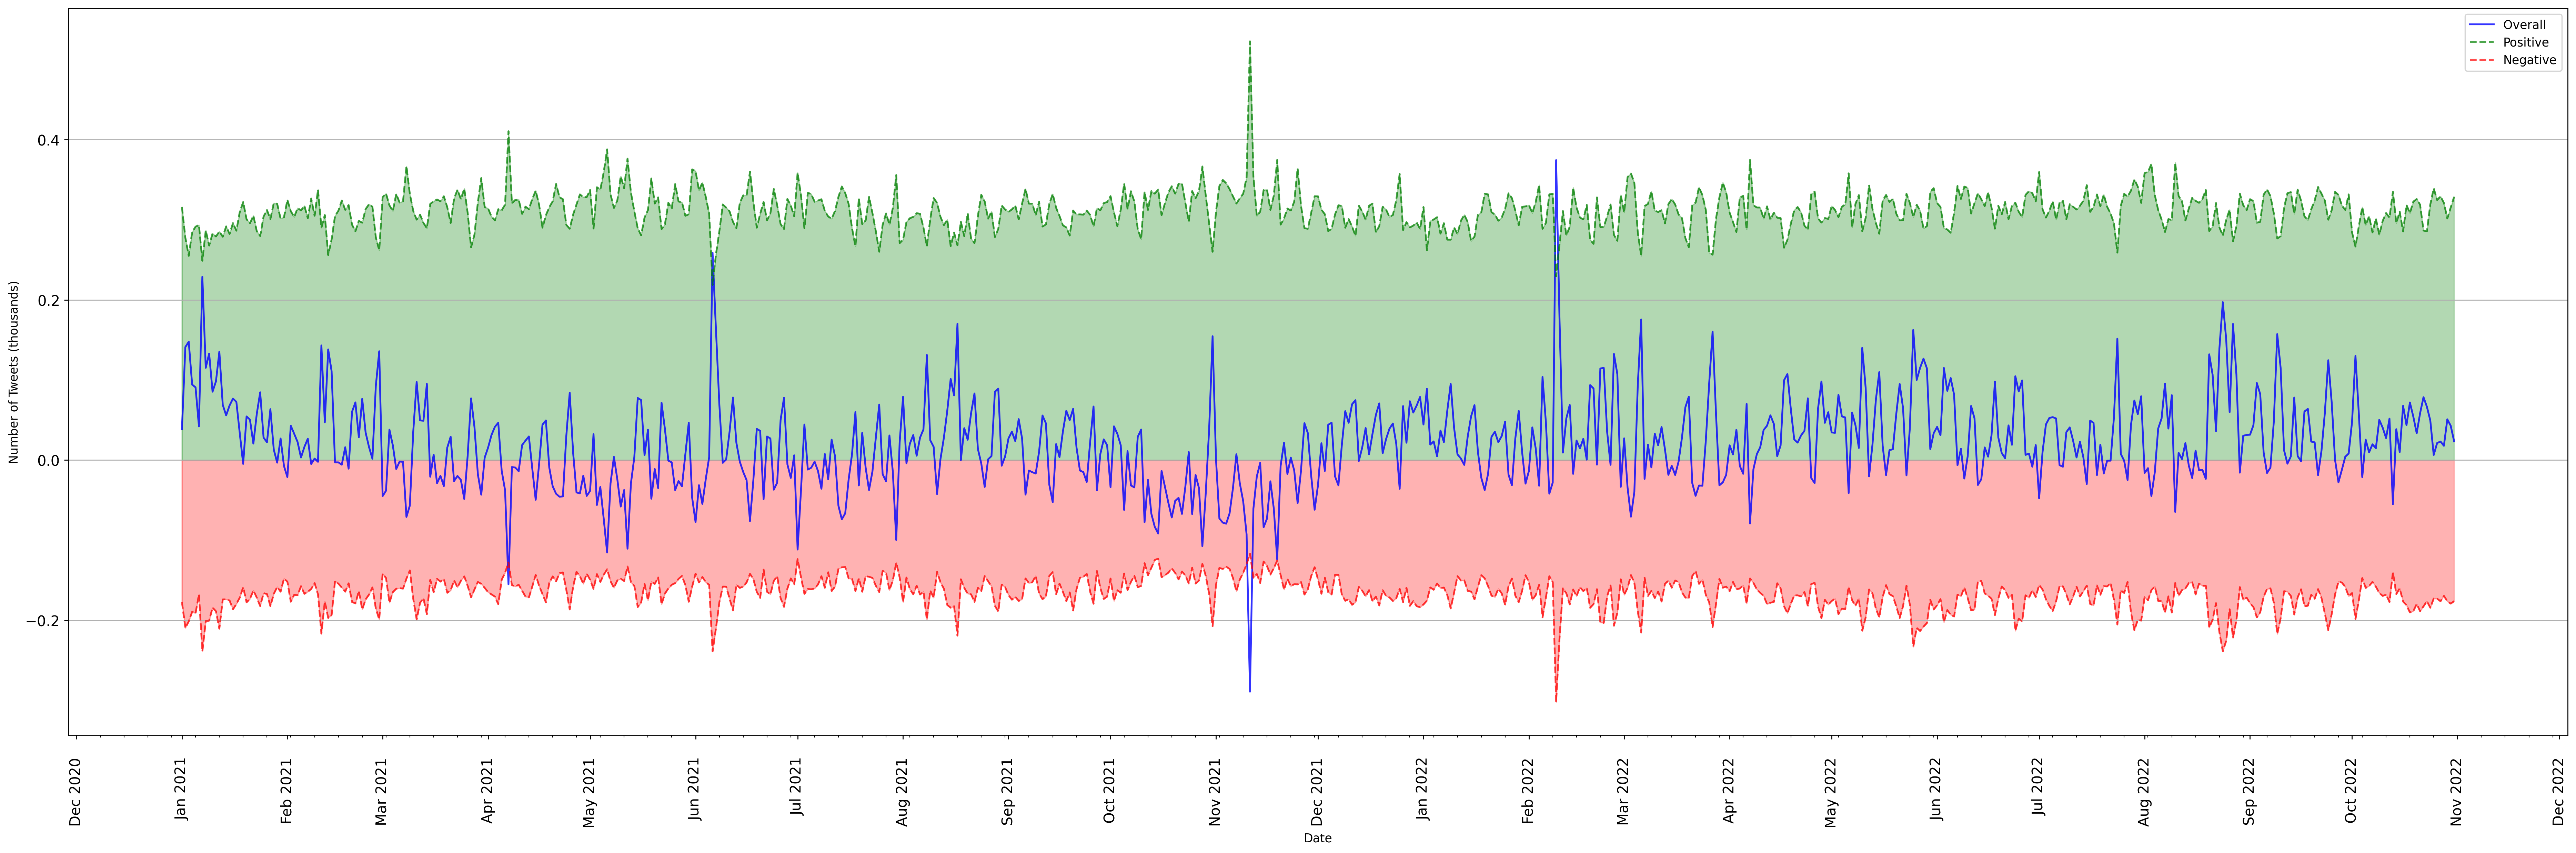

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Set Datetime column as index
df.set_index('Datetime', inplace=True)

# Resample data by day and count the number of tweets for each sentiment category
resampled = df.groupby(['Datetime', 'Sentiment']).size().unstack(fill_value=0)

# Downsample data to reduce the number of data points
positive = resampled[1].resample('D').mean()
neutral = resampled[0].resample('D').mean()
negative = resampled[-1].resample('D').mean()

# Create the figure and axes object with size 5 by 11 inches
fig, ax = plt.subplots(figsize=(15, 5), dpi=150)

# Calculate the overall sentiment as the difference between the negative and positive sentiment
overall = negative.subtract(positive, fill_value=0).add(negative, fill_value=0)
ax.plot(overall.index, overall.values, label='Overall', color='blue', alpha=0.8)

# Plot the positive sentiment line in green
ax.plot(positive.index, positive.values, label='Positive', color='green', linestyle='--', alpha=0.7)

# Plot the negative sentiment line in the negative y-axis section in dotted red
ax.plot(negative.index, -negative.values, label='Negative', color='red', linestyle='--', alpha=0.7)

# Use shaded regions for spikes
ax.fill_between(positive.index, positive.values, alpha=0.3, color='green')
ax.fill_between(negative.index, -negative.values, alpha=0.3, color='red')

# Show the grid lines on the y-axis on all tick marks
ax.grid(axis='y')

# Set x-axis major tick marks for months and minor tick marks for weeks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Add year to major ticks
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
ax.tick_params(axis='x', which='major', pad=15, labelrotation=90)  # Rotate major tick labels by 0 degrees
ax.tick_params(axis='x', which='minor', pad=5, labelrotation=90)  # Rotate minor tick labels by 90 degrees

# Set font size of tick mark labels
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets (thousands)') # Update the Y-axis label with the unit
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


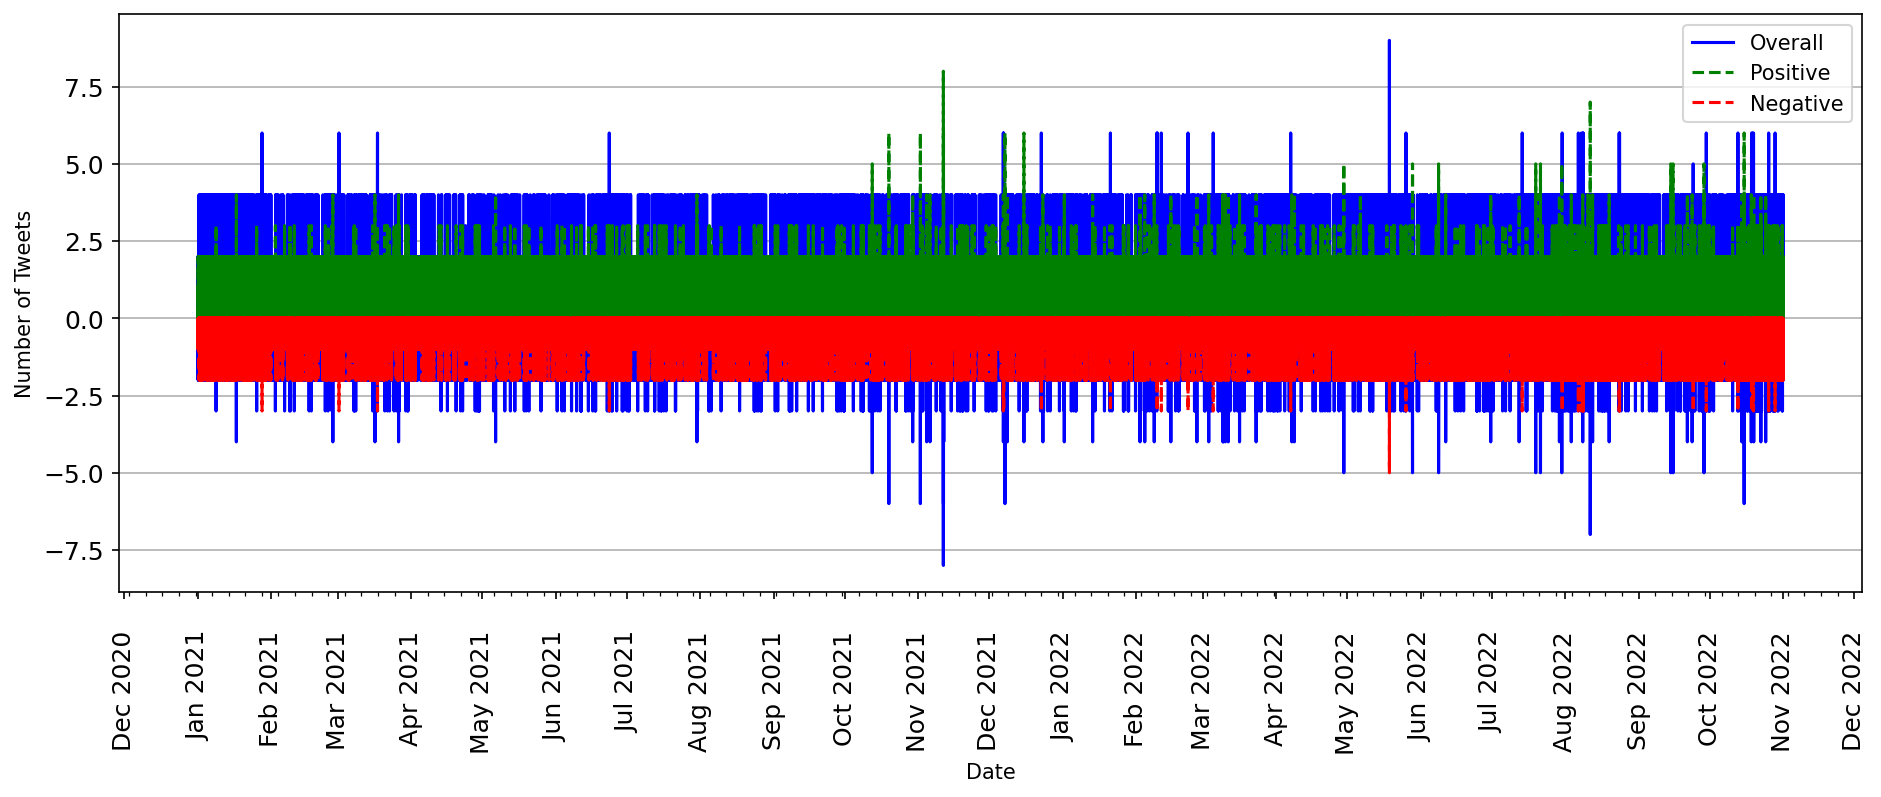

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# create separate dataframes for each sentiment category
positive = resampled[1]
neutral = resampled[0]
negative = resampled[-1]

# create the figure and axes object with size 5 by 11 inches
fig, ax = plt.subplots(figsize=(15, 5),dpi=150)

# calculate the overall sentiment as the difference between the negative and positive sentiment
overall = negative.subtract(positive, fill_value=0).add(negative, fill_value=0)
ax.plot(overall.index, overall.values, label='Overall', color='blue')

# plot the positive sentiment line in green
ax.plot(positive.index, positive.values, label='Positive', color='green', linestyle='--')

# plot the negative sentiment line in the negative y-axis section in dotted red
ax.plot(negative.index, -negative.values, label='Negative', color='red', linestyle='--')

# show the grid lines on y-axis on all tick marks
ax.grid(axis='y')

# set x-axis major tick marks for months and minor tick marks for days
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # add year to major ticks
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.tick_params(axis='x', which='major', pad=15, labelrotation=90) # rotate major tick labels by 0 degrees
ax.tick_params(axis='x', which='minor', pad=5, labelrotation=90) # rotate minor tick labels by 90 degrees

# set font size of tick mark labels
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# set axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.legend()

# show the plot
plt.show()

Sentiment Spike detected on:


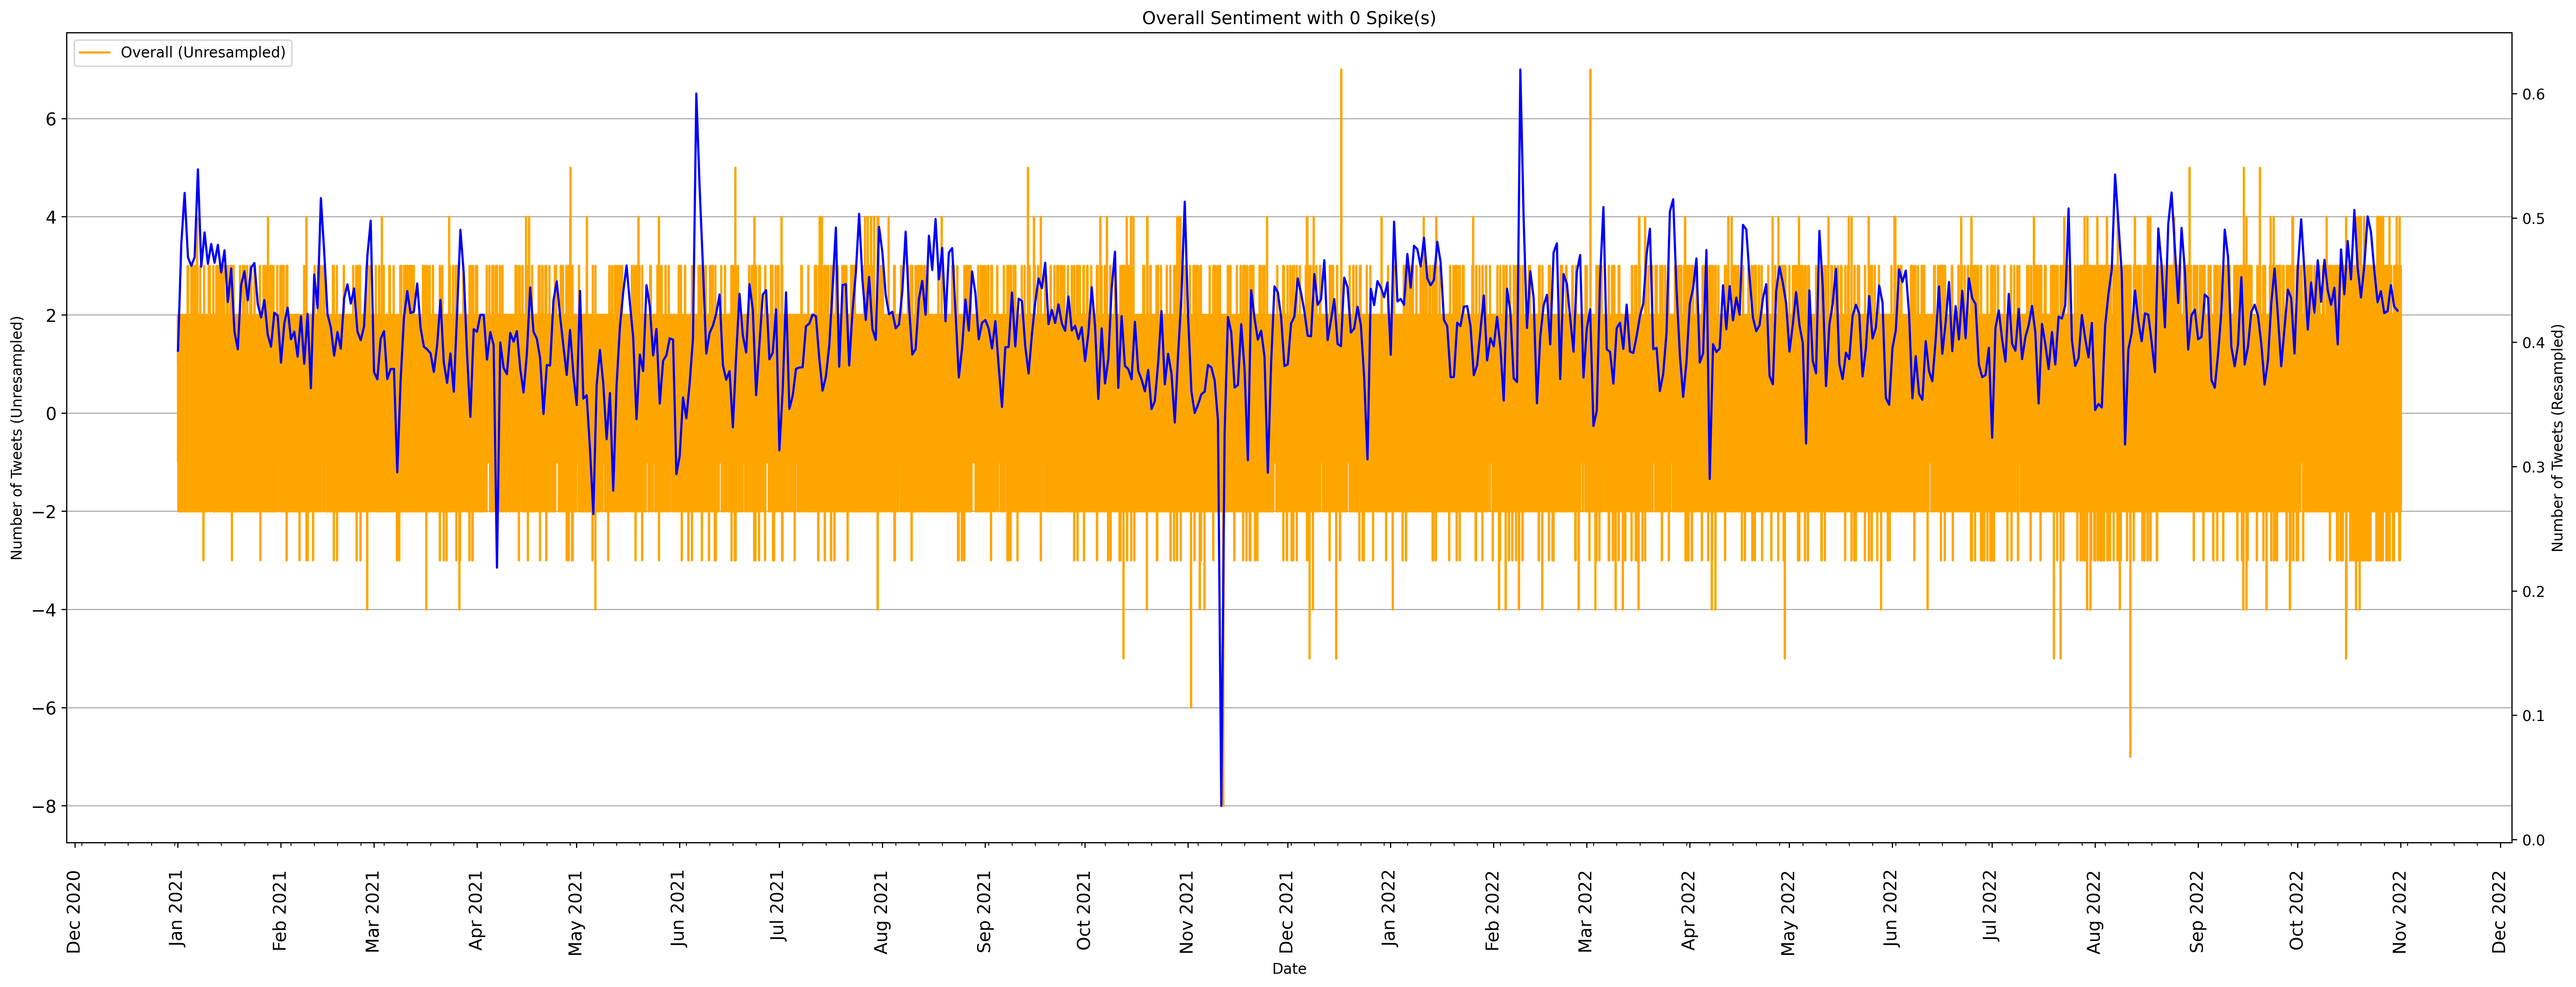

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Resample data by day and count the number of tweets for each sentiment category
resampled = df.groupby(['Datetime', 'Sentiment']).size().unstack(fill_value=0)

# Calculate the overall sentiment as the difference between the negative and positive sentiment
overall = resampled[-1].sub(resampled[1]).add(resampled[0], fill_value=0)

# Detect sentiment spikes using unresampled data
spike_thresh = 100
spikes = overall[overall.diff() > spike_thresh].index

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(30, 10), dpi=350)
ax_resampled = ax.twinx()  # Create a second y-axis for the resampled data

# Plot the unresampled data
ax.plot(overall.index, overall.values, label='Overall (Unresampled)', color='orange')

# Plot the resampled data on the second y-axis
ax_resampled.plot(overall.resample('D').mean().index, overall.resample('D').mean().values, label='Overall (Resampled)', color='blue')

# Plot the spikes as vertical lines on the graph
for spike in spikes:
    ax.axvline(spike, color='purple', linestyle='--', alpha=0.5)

# Print the spike dates to the console
print("Sentiment Spike detected on:")
for spike in spikes:
    print(spike)

# Set x-axis major tick marks for months and minor tick marks for days
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # add year to major ticks
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.tick_params(axis='x', which='major', pad=15, labelrotation=90) # rotate major tick labels by 0 degrees
ax.tick_params(axis='x', which='minor', pad=5, labelrotation=90) # rotate minor tick labels by 90 degrees

# Show the grid lines on y-axis on all tick marks
ax.grid(axis='y')

# Set font size of tick mark labels
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets (Unresampled)')
ax_resampled.set_ylabel('Number of Tweets (Resampled)')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))

# Set the graph title with the number of detected spikes
num_spikes = len(spikes)
ax.set_title(f'Overall Sentiment with {num_spikes} Spike(s)')

# Show the plot
plt.show()
